# Emotion Detection in Images of Faces (Keras)

**Keras** is a high-level neural networks API (programming framework), capable of running on top of lower-level frameworks including TensorFlow and CNTK. It is a good tool for rapid prototyping, allowing you to quickly try out different model architectures.

## Packages

In [1]:
import numpy as np
from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from kt_utils import *

import keras.backend as K
K.set_image_data_format('channels_last')
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

%matplotlib inline

Using TensorFlow backend.


## 1. Emotion Tracking

Classify emotions based on pictures of facial expressions. We first train the model to detect if someone is "happy" or "not happy."

In [2]:
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

# Normalize image vectors
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = Y_train_orig.T
Y_test = Y_test_orig.T

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


## 2. Building a Model in Keras

**Variable naming convention** -- Keras tends to re-use and overwrite the same variable at each step.

**Objects as Functions** 

There are two pairs of parentheses in each statement, where the first is a constructor call that creates an object (ZeroPadding2D).

`X = ZeroPadding2D((3, 3))(X_input)` is equivalent to:
```
ZP = ZeroPadding2D((3, 3)) # ZP is an object that can be called as a function
X = ZP(X_input) 
```

`input_shape -- (height, width, channels)`

In [10]:
def HappyModel(input_shape):  
    
    X_input = Input(input_shape)                                       # define input placeholder with input_shape
    X = ZeroPadding2D((3, 3))(X_input)                                 # zero-padding of X_input
    
    # CONV > BN > RELU Block
    X = Conv2D(32, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(axis = 3, name = 'bn0')(X)
    X = Activation('relu')(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool')(X)

    # FLATTEN > FULLYCONNECTED
    X = Flatten()(X)
    X = Dense(1, activation='sigmoid', name='fc')(X)

    # Create Keras model instance, used to train/test the model
    model = Model(inputs = X_input, outputs = X, name='HappyModel')
    
    return model

To train and test this model in Keras, there are four steps:
1. Create the model: call the function above 
2. Compile the model: call `model.compile(optimizer = "...", loss = "...", metrics = ["accuracy"])`  
3. Train the model: call `model.fit(x = ..., y = ..., epochs = ..., batch_size = ...)`  
4. Test the model: call `model.evaluate(x = ..., y = ...)`  

In [12]:
happyModel = HappyModel(X_train.shape[1:])                                                 # create the model
happyModel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])     # compile the model
happyModel.fit(x=X_train, y=Y_train, epochs=40, batch_size=16)                             # train the model
preds = happyModel.evaluate(x=X_test, y=Y_test)                                            # evaluate the model
print()
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

Epoch 1/40
600/600 [==============================] - 12s - loss: 0.9568 - acc: 0.7100    
Epoch 2/40
600/600 [==============================] - 12s - loss: 0.2070 - acc: 0.9217    
Epoch 3/40
600/600 [==============================] - 12s - loss: 0.2112 - acc: 0.9267    
Epoch 4/40
600/600 [==============================] - 12s - loss: 0.1480 - acc: 0.9450    
Epoch 5/40
600/600 [==============================] - 12s - loss: 0.0784 - acc: 0.9733    
Epoch 6/40
600/600 [==============================] - 12s - loss: 0.0924 - acc: 0.9767    
Epoch 7/40
600/600 [==============================] - 12s - loss: 0.1050 - acc: 0.9650    
Epoch 8/40
600/600 [==============================] - 12s - loss: 0.0900 - acc: 0.9633    
Epoch 9/40
600/600 [==============================] - 12s - loss: 0.1072 - acc: 0.9617    
Epoch 10/40
600/600 [==============================] - 12s - loss: 0.0738 - acc: 0.9733    
Epoch 11/40
600/600 [==============================] - 12s - loss: 0.1012 - acc: 0.9633  

In [13]:
happyModel.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
zero_padding2d_3 (ZeroPaddin (None, 70, 70, 3)         0         
_________________________________________________________________
conv0 (Conv2D)               (None, 64, 64, 32)        4736      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 64, 64, 32)        128       
_________________________________________________________________
activation_3 (Activation)    (None, 64, 64, 32)        0         
_________________________________________________________________
max_pool (MaxPooling2D)      (None, 32, 32, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32768)             0         
__________

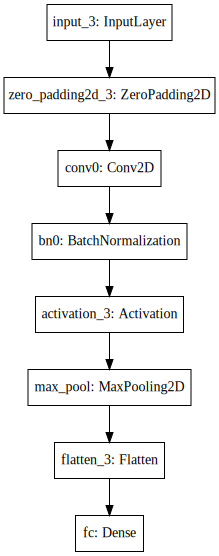

In [14]:
plot_model(happyModel, to_file='HappyModel.png')
SVG(model_to_dot(happyModel).create(prog='dot', format='svg'))